<a href="https://colab.research.google.com/github/shivashukla02/World-Bank-Global-Edu-Analysis/blob/main/SHIVANK_World_Bank_Global_Edu_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The World Bank EdStats All Indicator Query holds over 4,000 internationally comparable indicators that describe education access, progression, completion, literacy, teachers, population, and expenditures.The indicators cover the education cycle from pre-primary to vocational and tertiary education and also holds learning outcome data from international and regional learning assessments (e.g. PISA, TIMSS, PIRLS), equity data from household surveys, and projection/attainment data. </b>

## <b> Explore and analyze the data to identify variation of indicators across the globe, which countries are more alike and different. Feel free to add more extensive analyses and details.</b>

In [91]:
# Importing all the libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

In [92]:
# Now we are importing the drive for mounting.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
# Loading all the csv files.
path1=('/content/drive/MyDrive/Project Data/World bank global edu data/EdStatsCountry-Series.csv')
path2=('/content/drive/MyDrive/Project Data/World bank global edu data/EdStatsCountry.csv')
path3=('/content/drive/MyDrive/Project Data/World bank global edu data/EdStatsData.csv')
path4=('/content/drive/MyDrive/Project Data/World bank global edu data/EdStatsFootNote.csv')
path5=('/content/drive/MyDrive/Project Data/World bank global edu data/EdStatsSeries.csv')


In [94]:
country_df=pd.read_csv(path2)
main_data=pd.read_csv(path3)


***Acquiring the Overview of data***

---


---







In [95]:
main_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [96]:
# From columns of Main Data dropping the NULL values.
main_data.drop(['2016','2017','2020','2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],axis=1,inplace=True)

main_data.drop(['Country Code'],axis=1,inplace=True)


In [97]:
main_data.set_index(['Country Name'],inplace=True)

In [98]:
# Setting up two Data Frames.
Income_df=main_data.loc[['Heavily indebted poor countries (HIPC)', 'High income','Least developed countries: UN classification', 'Low & middle income', 'Low income', 'Lower middle income','Middle income']]

In [99]:
Region_df=main_data.loc[['World','Arab World','East Asia & Pacific','East Asia & Pacific (excluding high income)','Europe & Central Asia','Europe & Central Asia (excluding high income)','European Union','Euro area','Latin America & Caribbean','Latin America & Caribbean (excluding high income)','Middle East & North Africa','Middle East & North Africa (excluding high income)','North America','OECD members','Least developed countries: UN classification','South Asia','Sub-Saharan Africa','Sub-Saharan Africa (excluding high income)']]

**POPULATION GROWTH DATA**

---



In [100]:
population_growth =Income_df[Income_df['Indicator Code']=='SP.POP.GROW']

In [101]:
population_growth.drop(['Indicator Name','Indicator Code'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [102]:
graph_1=population_growth.transpose()

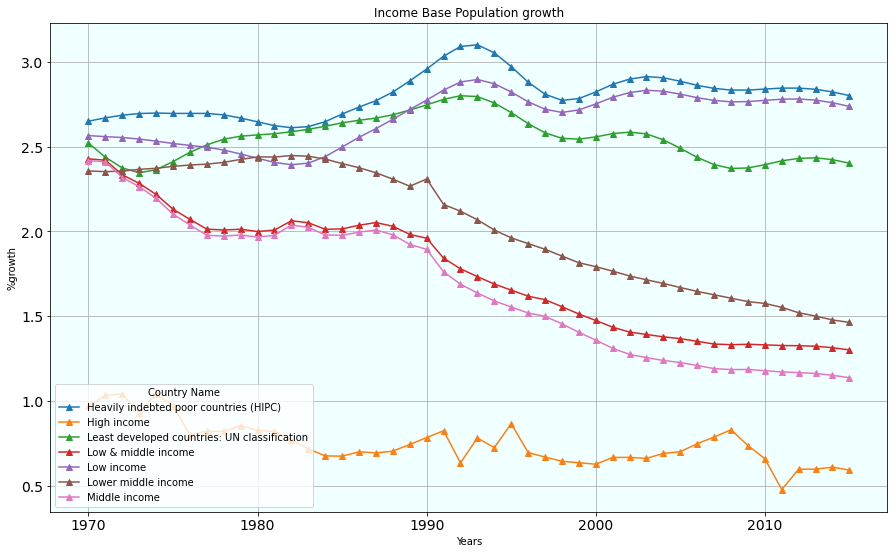

In [103]:
plt.rcParams['figure.figsize']=(15,5)
graph_1.plot( kind="line",xlabel = "Years" , ylabel = "%growth",
               title="Income Base Population growth",   
               fontsize = 14,figsize=(15,9),
                 grid=True,linewidth =1.5, 
                marker = "^").patch.set_facecolor('#f0ffff')

**ANALYSIS FOR GIRLS EDUCATION**

---



In [104]:
girl_eduction_income=Income_df.copy()

In [105]:
girl_education_income_notnull=girl_eduction_income.loc[:,['Indicator Code','2010','2011','2012','2013','2014','2015']].dropna()

In [106]:
girl_education_income_primary=girl_education_income_notnull[girl_education_income_notnull['Indicator Code']=='SE.PRE.ENRL.FE']

In [107]:
girl_education_income_primary.drop(['Indicator Code'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [108]:
graph_2=girl_education_income_primary.transpose()

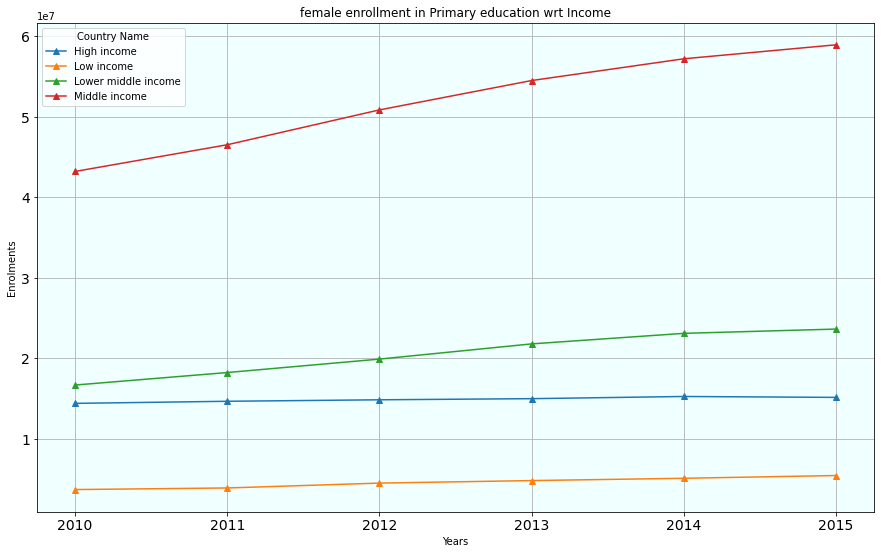

In [109]:
plt.rcParams['figure.figsize']=(10,5)
graph_2.plot( kind="line",xlabel = "Years" , ylabel = "Enrolments",
               title="female enrollment in Primary education wrt Income",   
               figsize=(15,9), fontsize = 14,
                 grid=True,linewidth =1.5, 
                marker = "^").patch.set_facecolor('#f0ffff')

In [110]:
girl_education_income_secondry=girl_education_income_notnull[girl_education_income_notnull['Indicator Code']=='SE.SEC.ENRL.FE']
girl_education_income_secondry.drop(['Indicator Code'],axis=1,inplace=True)
graph_2b=girl_education_income_secondry.transpose()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


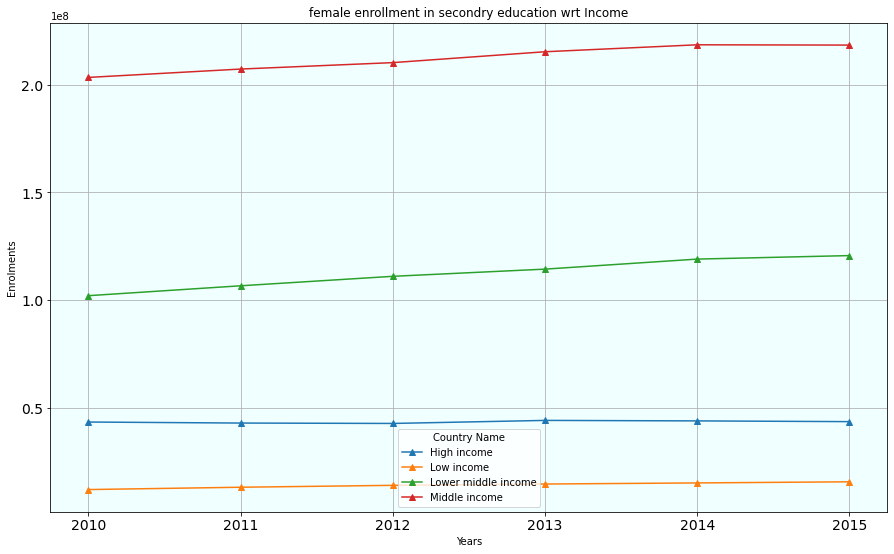

In [111]:
plt.rcParams['figure.figsize']=(10,5)
graph_2b.plot( kind="line",xlabel = "Years" , ylabel = "Enrolments",
               title="female enrollment in secondry education wrt Income",   
               figsize=(15,9), fontsize = 14,
                 grid=True,linewidth =1.5, 
                marker = "^").patch.set_facecolor('#f0ffff')

In [112]:
girl_education_income_secondry=girl_education_income_notnull[girl_education_income_notnull['Indicator Code']=='SE.TER.ENRL.FE']
girl_education_income_secondry.drop(['Indicator Code'],axis=1,inplace=True)
graph_2c=girl_education_income_secondry.transpose()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


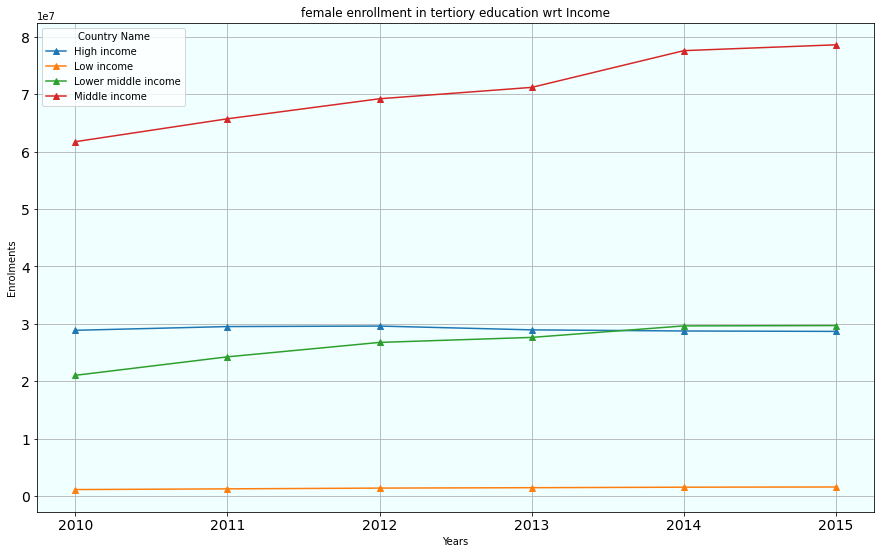

In [113]:
plt.rcParams['figure.figsize']=(10,5)
graph_2c.plot( kind="line",xlabel = "Years" , ylabel = "Enrolments",
               title="female enrollment in tertiory education wrt Income",   
               figsize=(15,9), fontsize = 14,
                 grid=True,linewidth =1.5, 
                marker = "^").patch.set_facecolor('#f0ffff')

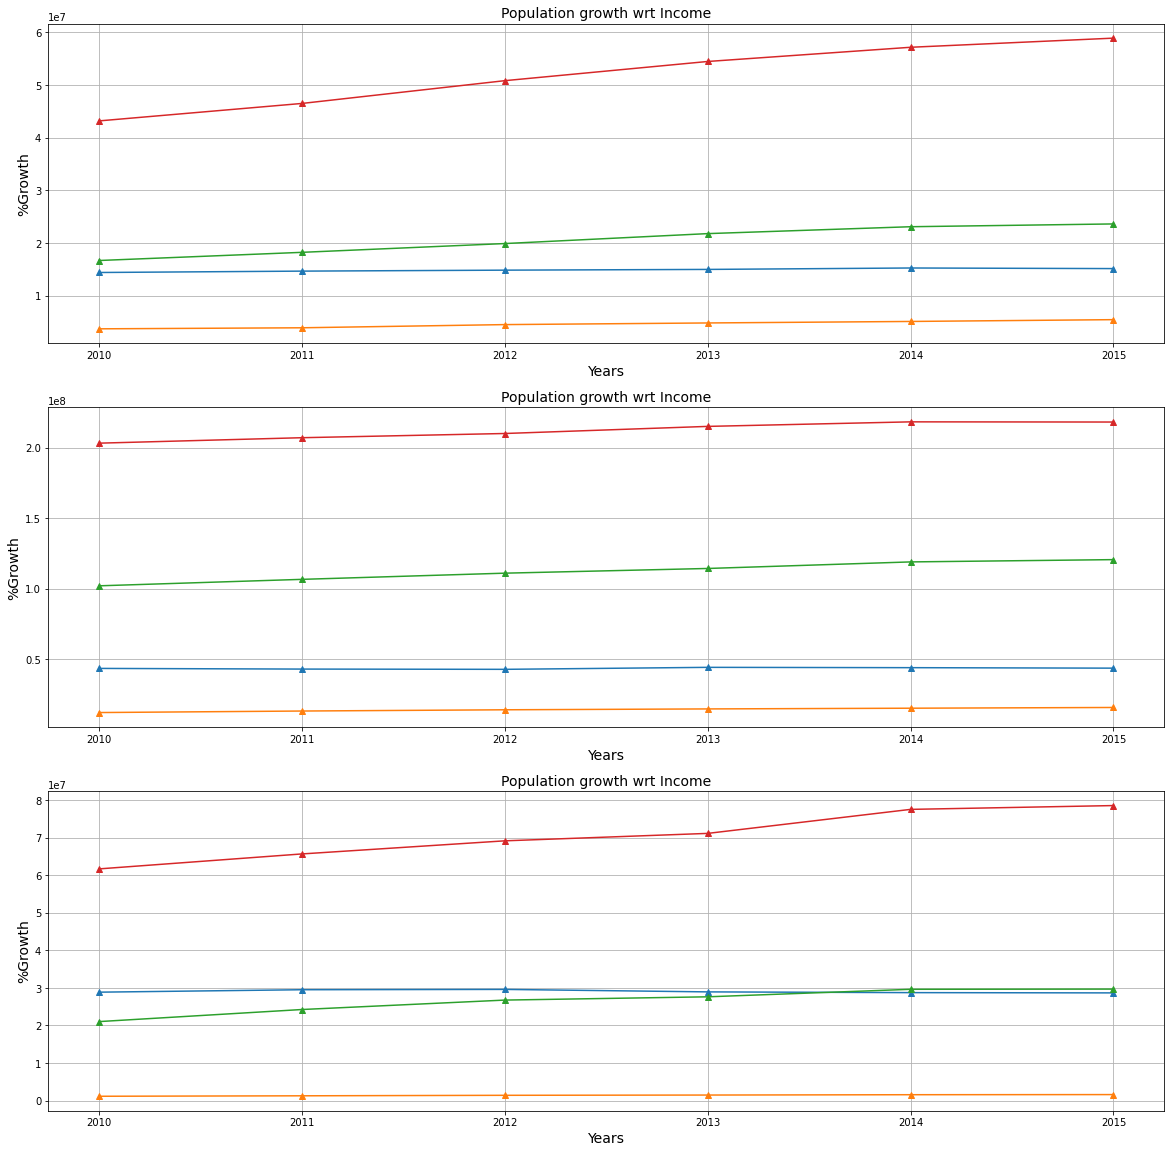

In [127]:
# Subplotting the chart of all three female enrollment wrt income.
plt.subplot(3,1,1)
plt.plot(graph_2, marker = "^")
plt.rcParams['figure.figsize']=(20,20)
plt.title('Population growth wrt Income',fontsize=14)
plt.xlabel('Years',fontsize=14)
plt.ylabel('%Growth',fontsize=14)
plt.grid(True)

plt.subplot(3,1,2)
plt.plot(graph_2b, marker = "^")
plt.rcParams['figure.figsize']=(20,20)
plt.title('Population growth wrt Income',fontsize=14)
plt.xlabel('Years',fontsize=14)
plt.ylabel('%Growth',fontsize=14)
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(graph_2c,marker = "^")
plt.rcParams['figure.figsize']=(20,20)
plt.title('Population growth wrt Income',fontsize=14)
plt.xlabel('Years',fontsize=14)
plt.ylabel('%Growth',fontsize=14)
plt.grid(True)

plt.show()


In [126]:
country_income_df=country_df[['Income Group','Region','Short Name']]

In [116]:
country_income_df.set_index(country_income_df['Income Group'],inplace=True)

In [117]:
graph=country_income_df.loc[['High income: nonOECD','High income: OECD','Low income','Upper middle income','Lower middle income'],['Region','Short Name']].transpose()

In [118]:
graph_3a=main_data.loc[main_data['Indicator Code']=='NY.GDP.MKTP.CD','2015'].drop(['Heavily indebted poor countries (HIPC)', 'High income','Least developed countries: UN classification', 'Low & middle income', 'Low income', 'Lower middle income','Middle income','World','Arab World','East Asia & Pacific','East Asia & Pacific (excluding high income)','Europe & Central Asia','Europe & Central Asia (excluding high income)','European Union','Euro area','Latin America & Caribbean','Latin America & Caribbean (excluding high income)','Middle East & North Africa','Middle East & North Africa (excluding high income)','North America','OECD members','Least developed countries: UN classification','South Asia','Sub-Saharan Africa','Sub-Saharan Africa (excluding high income)','Upper middle income'],axis=0).dropna()

In [119]:
df = graph_3a.to_frame(name="2015")
country_above_mean_gdp=df[df['2015']>np.mean(df['2015'])]

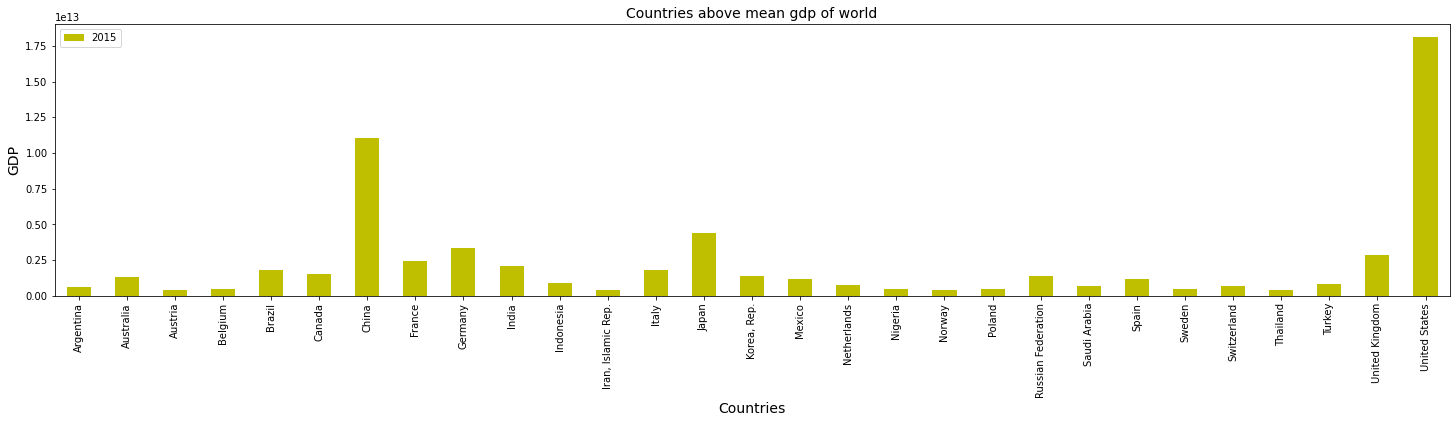

In [129]:
plt.rcParams['figure.figsize']=(25,5)
country_above_mean_gdp.plot(kind='bar',color='y')
plt.title('Countries above mean gdp of world',fontsize=14)
plt.xlabel('Countries',fontsize=14)
plt.ylabel('GDP',fontsize=14)
plt.show()

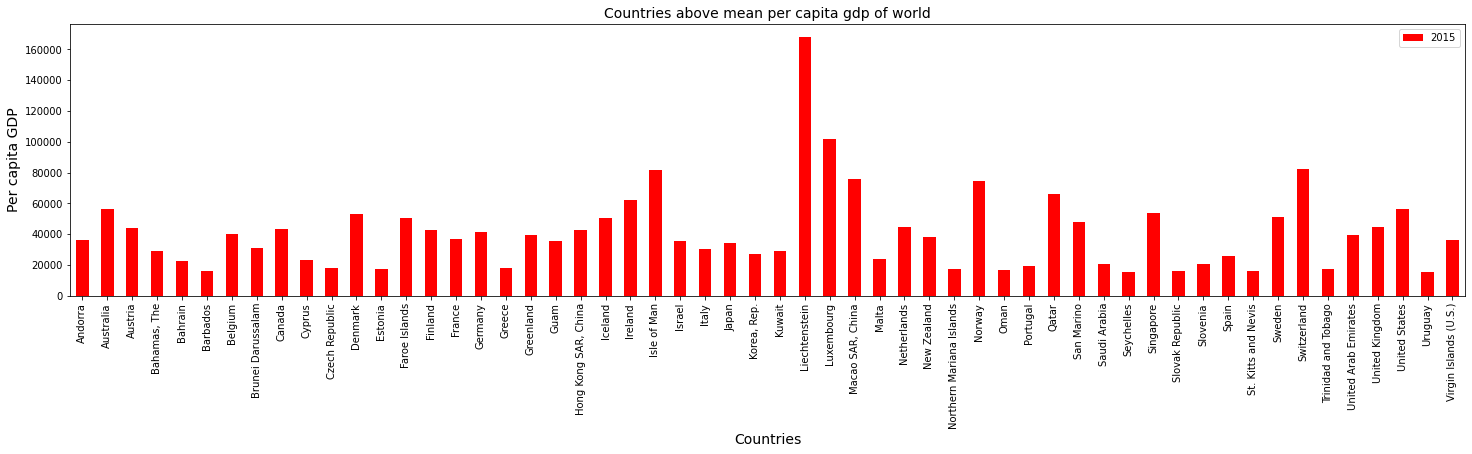

In [130]:
graph_3b=main_data.loc[main_data['Indicator Code']=='NY.GDP.PCAP.CD','2015'].drop(['Heavily indebted poor countries (HIPC)', 'High income','Least developed countries: UN classification', 'Low & middle income', 'Low income', 'Lower middle income','Middle income','World','Arab World','East Asia & Pacific','East Asia & Pacific (excluding high income)','Europe & Central Asia','Europe & Central Asia (excluding high income)','European Union','Euro area','Latin America & Caribbean','Latin America & Caribbean (excluding high income)','Middle East & North Africa','Middle East & North Africa (excluding high income)','North America','OECD members','Least developed countries: UN classification','South Asia','Sub-Saharan Africa','Sub-Saharan Africa (excluding high income)','Upper middle income'],axis=0).dropna()
df_1 = graph_3b.to_frame(name="2015")
country_above_mean_pcgdp=df_1[df_1['2015']>np.mean(df_1['2015'])]
plt.rcParams['figure.figsize']=(25,5)
country_above_mean_pcgdp.plot(kind='bar',color='r')
plt.title('Countries above mean per capita gdp of world',fontsize=14)
plt.xlabel('Countries',fontsize=14)
plt.ylabel('Per capita GDP',fontsize=14)
plt.show()

In [122]:
Countries_incomegroup=country_df[['Income Group','Short Name']].groupby(country_df[['Income Group','Short Name']]['Income Group']).agg({'Short Name':'count'})
Countries_incomegroup.rename(columns = {'Income Group':'new_col1', 'Short Name':'new_col2'}, inplace = True)
Countries_incomegroup


,new_col2
Income Group,
High income: OECD,31
High income: nonOECD,44
Low income,34
Lower middle income,50
Upper middle income,55


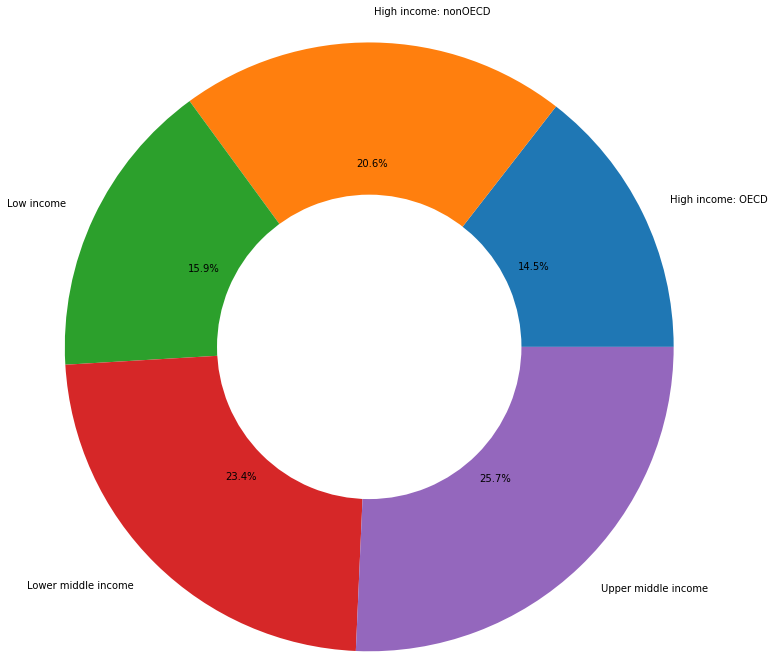

In [134]:
Income = ['High income: OECD','High income: nonOECD','Low income','Lower middle income','Upper middle income']

data = [31,44,34,50,55]
 
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = Income,autopct='%0.1f%%',radius=2)
plt.pie([100],colors=['w'],radius=1)

# show plot
plt.show()

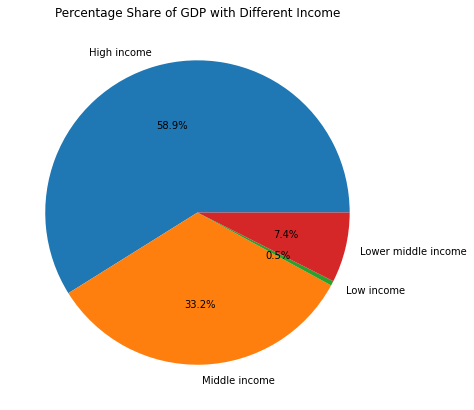

In [124]:
GDP_Share =Income_df[Income_df['Indicator Code']=='NY.GDP.MKTP.CD']
GDP_Share.loc[['High income', 'Middle income', 'Low income', 'Lower middle income',],['2015']]
name = ['High income', 'Middle income', 'Low income', 'Lower middle income',]
quantity=[4.757751e+13,2.679605e+13,4.023901e+11,6.017050e+12]
fig = plt.figure(figsize =(10, 7))
plt.pie(quantity,labels=name,autopct='%0.1f%%')
plt.title('Percentage Share of GDP with Different Income')
plt.show()